<a href="https://colab.research.google.com/github/delicate99/Bioinformatics/blob/main/SKBIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit_bio

     |████████████████████████████████| 8.4 MB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.5.6-cp37-cp37m-linux_x86_64.whl size=1456883 sha256=86b0167e0590127511a48f0e17bc83e1c6d5442aaecc1e97557367168e504fda
  Stored in directory: /root/.cache/pip/wheels/7e/fa/86/a8b3b3b1187f0b0997fca40cdb7dd0d81a57ff061010e4464d
  Created wheel for hdmedians: filename=hdmedians-0.14.2-cp37-cp37m-linux_x86_64.whl size=453186 sha256=ce38742178d5a797f934926096cfdf095ad403c8264011f334d58fadd3830fa3
  Stored in directory: /root/.cache/pip/wheels/56/5d/28/fb40426fbf6a8c3af88376a227130bbdf81e00177123e1398e
Successfully built scikit-bio hdmedians


In [2]:
import skbio

In [3]:
dir(skbio)

['DNA',
 'DistanceMatrix',
 'GeneticCode',
 'OrdinationResults',
 'Protein',
 'RNA',
 'Sequence',
 'TabularMSA',
 'TreeNode',
 '__all__',
 '__builtins__',
 '__cached__',
 '__credits__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_base',
 'alignment',
 'art',
 'diversity',
 'io',
 'local_pairwise_align_ssw',
 'metadata',
 'motto',
 'mottos',
 'nj',
 'read',
 'sequence',
 'skbio',
 'stats',
 'title',
 'tree',
 'util',
 'write']

In [4]:
from skbio import DNA,RNA,Protein, Sequence

In [5]:
seq1=Sequence("ATGATCTCGTAA")

In [6]:
seq1


Sequence
---------------
Stats:
    length: 12
---------------
0 ATGATCTCGT AA

In [7]:
str(seq1)

'ATGATCTCGTAA'

In [8]:
dna_seq = DNA('ATGATCTCGTAA')

In [9]:
dna_seq

DNA
--------------------------
Stats:
    length: 12
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATGATCTCGT AA

In [10]:
# Metadata
d=DNA("ACCGGGTA", metadata ={'id':'my_seqeunce','description':'GFP'},
      positional_metadata={'quality':[22,25,22,18,23,25,25,25]})

In [11]:
d

DNA
-----------------------------
Metadata:
    'description': 'GFP'
    'id': 'my_seqeunce'
Positional metadata:
    'quality': <dtype: int64>
Stats:
    length: 8
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 62.50%
-----------------------------
0 ACCGGGTA

In [12]:
dna_seq.alphabet

{'-',
 '.',
 'A',
 'B',
 'C',
 'D',
 'G',
 'H',
 'K',
 'M',
 'N',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

In [13]:
## Sequence Manipulation

In [14]:
dir(dna_seq)

['_GrammaredSequence__definite_char_codes',
 '_GrammaredSequence__degenerate_codes',
 '_GrammaredSequence__gap_codes',
 '_GrammaredSequence__validation_mask',
 '_NucleotideMixin__complement_lookup',
 '_NucleotideMixin__gc_codes',
 '__abstractmethods__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_ascii_invert_case_bit_offset',
 '_ascii_lowercase_boundary',
 '_assert_can_cast_to',
 '_byte_ownership',
 '_bytes',
 '_chars_to_indices',
 '_complement_lookup',
 '_constructor',
 '_convert_to_uppercase',

In [15]:
print(dna_seq)

ATGATCTCGTAA


In [16]:
dna_seq.values

array([b'A', b'T', b'G', b'A', b'T', b'C', b'T', b'C', b'G', b'T', b'A',
       b'A'], dtype='|S1')

In [17]:
# reverese compliment
dna_seq.complement()

DNA
--------------------------
Stats:
    length: 12
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 TACTAGAGCA TT

In [18]:
# Reverse compliment
dna_seq.reverse_complement().is_reverse_complement(dna_seq)

True

In [19]:
str(dna_seq.complement())[::-1]

'TTACGAGATCAT'

In [20]:
dna_seq.count('G')

2

In [21]:
dna_seq.index("T")

1

In [22]:
len(dna_seq)

12

In [23]:
dna_seq[0:3]

DNA
--------------------------
Stats:
    length: 3
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ATG

In [24]:
for match in dna_seq.find_with_regex('(ATG+)'):
    print(match)
    print(str(dna_seq[match]))

slice(0, 3, None)
ATG


In [25]:
 #Find_motif
 for motif_slice in dna_seq.find_motifs("purine-run", min_length=2):
     print(motif_slice)
     print(str(dna_seq[motif_slice]))

slice(2, 4, None)
GA
slice(10, 12, None)
AA


In [26]:
mRNA=dna_seq.transcribe()

In [27]:
protein=mRNA.translate()

In [28]:
protein

Protein
--------------------------
Stats:
    length: 4
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
--------------------------
0 MIS*

In [29]:
from skbio import Protein

In [30]:
protein_a =Protein("MITITV")

In [31]:
protein_a

Protein
--------------------------
Stats:
    length: 6
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: False
--------------------------
0 MITITV

In [32]:
#dir(protein_a)

In [33]:
# GC Contetnt
dna_seq.gc_content()

0.3333333333333333

In [34]:
dna_seq.gc_frequency()

4

In [35]:
def gc_content(seq):
    return float(seq.count("G")+seq.count("C"))/len(seq) *100

In [36]:
gc_content(dna_seq)

33.33333333333333

In [37]:
from collections import Counter

In [38]:
num=Counter(str(dna_seq))

In [39]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

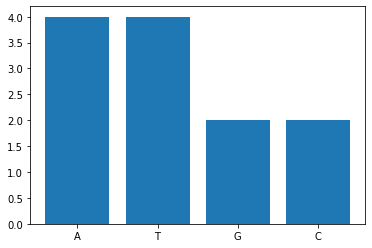

In [40]:
plt.bar(num.keys(), num.values())

##Hamming distance

In [41]:
seq1 =DNA("ACTATCAGT")
seq2 =DNA("ACTTACAGT")

In [42]:
seq1.matches(seq2) # Boolean , same length

array([ True,  True,  True, False, False,  True,  True,  True,  True])

In [43]:
seq1.match_frequency(seq2)
seq1.mismatch_frequency(seq2)
seq1.distance(seq2)

0.2222222222222222

In [44]:
def hamming_distance(lhs,rhs):
    return len([(x,y) for x,y in zip(lhs,rhs) if x!=y])

In [45]:
hamming_distance(seq1,seq2)

2

In [46]:
# K-mer distance

from skbio.sequence.distance import kmer_distance

In [47]:
kmer_distance(seq1,seq2,3)

0.7272727272727273

In [48]:
seq1_k = seq1.kmer_frequencies(3).keys()
seq2_k = seq2.kmer_frequencies(3).keys()

In [49]:
seq1_k

dict_keys(['ACT', 'CTA', 'TAT', 'ATC', 'TCA', 'CAG', 'AGT'])

In [50]:
seq2_k

dict_keys(['ACT', 'CTT', 'TTA', 'TAC', 'ACA', 'CAG', 'AGT'])

In [51]:
def custom_kmer_distance(seq1,seq2):
    seq1_set=set(seq1)
    seq2_set=set(seq2)
    union_seq=seq1_set.union(seq2_set)
    intersection_seq=seq1_set.intersection(seq2_set)
    disimilarity = len(union_seq - intersection_seq)
    print(disimilarity)
    distance = disimilarity/len(union_seq)
    return distance

In [52]:
custom_kmer_distance(seq1_k,seq2_k)

8


0.7272727272727273

In [53]:
def custom_kmer_distance2(seq1,seq2):
    seq1_set=set(seq1)
    seq2_set=set(seq2)
    union_seq=seq1_set.union(seq2_set)
    disimilarity = seq1_set ^ seq2_set
    print(disimilarity)
    distance = len(disimilarity)/len(union_seq)
    return distance

In [54]:
custom_kmer_distance2(seq1_k,seq2_k)

{'ACA', 'CTA', 'TTA', 'ATC', 'CTT', 'TAC', 'TCA', 'TAT'}


0.7272727272727273

In [55]:
dna_seq.frequencies(chars={"A",'C'}, relative=True)

{'A': 0.3333333333333333, 'C': 0.16666666666666666}

In [56]:
# find kmers
dna_seq.kmer_frequencies(3)

{'ATC': 1,
 'ATG': 1,
 'CGT': 1,
 'CTC': 1,
 'GAT': 1,
 'GTA': 1,
 'TAA': 1,
 'TCG': 1,
 'TCT': 1,
 'TGA': 1}

In [57]:
dna_seq.kmer_frequencies(4)

{'ATCT': 1,
 'ATGA': 1,
 'CGTA': 1,
 'CTCG': 1,
 'GATC': 1,
 'GTAA': 1,
 'TCGT': 1,
 'TCTC': 1,
 'TGAT': 1}

In [58]:
def count_kmers(seq, k=3):
    count={}
    num_kmers =len(seq) - k +1
    for i in range(num_kmers):
        kmer =seq[i:i+k]
        if kmer not in count:
            count[kmer]=0
        count[kmer] += 1
    return count

In [59]:
count_kmers(str(dna_seq), k=3)

{'ATC': 1,
 'ATG': 1,
 'CGT': 1,
 'CTC': 1,
 'GAT': 1,
 'GTA': 1,
 'TAA': 1,
 'TCG': 1,
 'TCT': 1,
 'TGA': 1}

In [60]:
# iterating throught a kmer
for k in dna_seq.iter_kmers(3, overlap=True):
    print(k)

ATG
TGA
GAT
ATC
TCT
CTC
TCG
CGT
GTA
TAA


In [61]:
dna_kfreq=dna_seq.kmer_frequencies(3)

<BarContainer object of 10 artists>

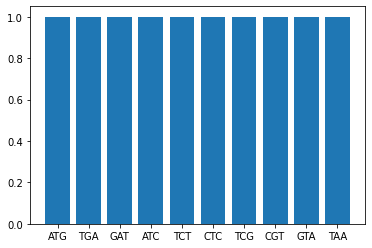

In [62]:
plt.bar(dna_kfreq.keys(),dna_kfreq.values())

## Sequence Alignment


In [63]:
# Target and Query sequence

In [64]:
import skbio.alignment as align

In [65]:
dir(align)

['AlignmentStructure',
 'StripedSmithWaterman',
 'TabularMSA',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_indexing',
 '_pairwise',
 '_repr',
 '_ssw_wrapper',
 '_tabular_msa',
 'global_pairwise_align',
 'global_pairwise_align_nucleotide',
 'global_pairwise_align_protein',
 'local_pairwise_align',
 'local_pairwise_align_nucleotide',
 'local_pairwise_align_protein',
 'local_pairwise_align_ssw',
 'make_identity_substitution_matrix']

In [66]:

print(seq1)
print(seq2)
seq3= DNA("ACTTAC")

ACTATCAGT
ACTTACAGT


In [67]:
# Local
alignment,score, start_end_positions =align.local_pairwise_align_ssw(seq1,seq2)

In [68]:
#Score
score

8

In [69]:
alignment

TabularMSA[DNA]
---------------------
Stats:
    sequence count: 2
    position count: 4
---------------------
CAGT
CAGT

In [70]:
#Get position
start_end_positions

[(5, 8), (5, 8)]

In [71]:
# Global_alignments(Gaps are dusplyed)

glo_alignment,glo_score, glo_start_end_positions =align.global_pairwise_align_nucleotide(seq1,seq2)

/usr/local/lib/python3.7/dist-packages/skbio/alignment/_pairwise.py:599: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


In [72]:
glo_alignment

TabularMSA[DNA]
---------------------
Stats:
    sequence count: 2
    position count: 9
---------------------
ACTATCAGT
ACTTACAGT

In [73]:
glo_score

3.0

In [74]:
#Dissimilar Seq

In [75]:
glo_alignment,glo_score, glo_start_end_positions =align.global_pairwise_align_nucleotide(seq1,seq3)

/usr/local/lib/python3.7/dist-packages/skbio/alignment/_pairwise.py:599: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


In [76]:
glo_alignment


TabularMSA[DNA]
----------------------
Stats:
    sequence count: 2
    position count: 13
----------------------
----ACTATCAGT
ACTTAC-------

### Comparing Protein Sequence ALignments

In [77]:
from skbio import Protein

In [78]:
p1=Protein("MITITV")
p2=Protein("ITITV")

In [79]:
local_alignment_protein =align.local_pairwise_align_protein(p1,p2)

/usr/local/lib/python3.7/dist-packages/skbio/alignment/_pairwise.py:321: EfficiencyWarning: You're using skbio's python implementation of Smith-Waterman alignment. This will be very slow (e.g., thousands of times slower) than skbio.alignment.local_pairwise_align_ssw.
  EfficiencyWarning)


In [80]:
local_alignment_protein

(TabularMSA[Protein]
 ---------------------
 Stats:
     sequence count: 2
     position count: 5
 ---------------------
 ITITV
 ITITV, 25.0, [(1, 5), (0, 4)])

## Reading FIle
#### FASTA
#### Genbeank
####Netwick

In [84]:
import os
import skbio.io

In [87]:
os.getcwd()

'/content'

In [105]:
seq_file = skbio.io.read("drive/MyDrive/Bioinfo/covid19_sequence_NC_045512_2.fasta", format ='fasta')

In [107]:
dir(seq_file)

['__class__',
 '__del__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__name__',
 '__ne__',
 '__new__',
 '__next__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'close',
 'gi_code',
 'gi_frame',
 'gi_running',
 'gi_yieldfrom',
 'send',
 'throw']

In [114]:
for row in skbio.io.read("drive/MyDrive/Bioinfo/covid19_sequence_NC_045512_2.fasta", format ='fasta'):
    print(row)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [104]:
for i in seq_file:
    print(i)


In [119]:
print(i)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [101]:
from skbio import DNA, sequence

In [102]:
seq_file2 = Sequence.read("drive/MyDrive/Bioinfo/covid19_sequence_NC_045512_2.fasta")

In [117]:
print(seq_file2, sep='\n')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [120]:
seq_file2

Sequence
-----------------------------------------------------------------------
Metadata:
    'description': 'Severe acute respiratory syndrome coronavirus 2
                    isolate Wuhan-Hu-1, complete genome'
    'id': 'NC_045512.2'
Stats:
    length: 29903
-----------------------------------------------------------------------
0     ATTAAAGGTT TATACCTTCC CAGGTAACAA ACCAACCAAC TTTCGATCTC TTGTAGATCT
60    GTTCTCTAAA CGAACTTTAA AATCTGTGTG GCTGTCACTC GGCTGCATGC TTAGTGCACT
...
29820 TTTAGTAGTG CTATCCCCAT GTGATTTTAA TAGCTTCTTA GGAGAATGAC AAAAAAAAAA
29880 AAAAAAAAAA AAAAAAAAAA AAA

### Query NCBI

In [129]:
species_mit= skbio.sequence.GeneticCode.from_ncbi(21)

In [130]:
species_mit

GeneticCode (Trematode Mitochondrial)
-------------------------------------------------------------------------
  AAs  = FFLLSSSSYY**CCWWLLLLPPPPHHQQRRRRIIMMTTTTNNNKSSSSVVVVAAAADDEEGGGG
Starts = -----------------------------------M---------------M------------
Base1  = UUUUUUUUUUUUUUUUCCCCCCCCCCCCCCCCAAAAAAAAAAAAAAAAGGGGGGGGGGGGGGGG
Base2  = UUUUCCCCAAAAGGGGUUUUCCCCAAAAGGGGUUUUCCCCAAAAGGGGUUUUCCCCAAAAGGGG
Base3  = UCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAGUCAG

In [131]:
species_mit.name

'Trematode Mitochondrial'

In [132]:
species_mit.reading_frames

[1, 2, 3, -1, -2, -3]

In [133]:
seq1

DNA
--------------------------
Stats:
    length: 9
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ACTATCAGT

In [136]:
mrna1=seq1.transcribe()

In [137]:
mrna1

RNA
--------------------------
Stats:
    length: 9
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 33.33%
--------------------------
0 ACUAUCAGU

In [140]:
for i in species_mit.translate_six_frames(mrna1):
    print(i)


TIS
LS
YQ
TDS
LM
W*
